## TRANSPORTS

plots transports through JDF in mol/m2/s, daily, figures in ./FLUX_plot

In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
from __future__ import print_function
from numpy import *
from scipy import *
import netCDF4 as nc
import numpy as np
import scipy as sp
import seawater
import datetime as dt

""
from salishsea_tools import (
    nc_tools,
    viz_tools, 
    geo_tools,
    tidetools
)
import matplotlib.pyplot as plt
#matplotlib.use('Agg')
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
sys.path.append('/data/tjarniko/MEOPAR/tools/SalishSeaTools/salishsea_tools/')
import mocsy
import river_201702 as rv
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw
import datetime as dt

%matplotlib inline

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [5]:
def make_nclen(start,end,ftype, sdir):
    date_ar = []
    sens_ar = []
    doy_ar = []
    start_run = arrow.get(start)
    end_run = arrow.get(end)
    arrow_array = []
    for r in arrow.Arrow.span_range('day', start_run, end_run):
        arrow_array.append(r)

    dayslen = len(arrow_array)
    for i in range(0,dayslen):
        tdate = arrow_array[i][0]
        ddmmmyy = tdate.format('DDMMMYY').lower()
        ymd = tdate.format('YYYYMMDD')
        dddd = tdate.format('DDDD')
        nc_sens = sdir + '/SKOG_1d_*'+ ftype +'*' + ymd + '-' + ymd + '.nc'
        tnc_sens = glob.glob(nc_sens)
        sens_ar.append(tnc_sens[0])
        date_ar.append(ddmmmyy)
        doy_ar.append(dddd)
    return date_ar, sens_ar, doy_ar

In [12]:
start = '2015-01-01'
end = '2015-12-31'

st = dt.datetime(2015,1,1)
en = dt.datetime(2015,12,31)

y_st = st.timetuple().tm_yday
print(y_st)
y_en = en.timetuple().tm_yday
print(y_en)
ts_BR = np.arange(y_st,y_en+1,1)

sdir_br = '/data/tjarniko/results/BR_2nd_2015_cop/SKOG_2/ncs'

#dates_preind, files_preind, doy_preind = make_nclen(start,end,'dian_U', sdir_preind)
dates_br, files_br, doy_br = make_nclen(start,end,'dian_U', sdir_br)
dates_br, files_br_grid, doy_br = make_nclen(start,end,'grid_T', sdir_br)


1
365


In [13]:
t_testU_BR = nc.Dataset(files_br[0])



DIC_UT = t_testU_BR['DIC_UT']
DIC_UT_jdfmouth2d_BR = np.squeeze(DIC_UT_jdfmouth_BR)
DIC_UT_jdfmouth_BR = DIC_UT[:,:,:,20]




depth_bounds = t_testU_BR['depthu_bounds']
depth_cell = np.zeros(40)
depth_cell[:] = depth_bounds[:,1]-depth_bounds[:,0]
area_cells_all = np.zeros_like(DIC_UT_jdfmouth2d_BR)
area_cell = depth_cell*440
#     zlevels = physdat.variables['deptht']
for i in range(0,898):
    area_cells_all[:,i] = area_cell
zlevels = t_testU_BR.variables['depthu']


then run bash mov5.sh ./FLUX_plot/ FLUXDIFF_2NDYR_

In [9]:
print(zlevels[:])

[   0.5000003     1.5000031     2.50001144    3.50003052    4.50007057
    5.50015068    6.50031042    7.50062323    8.50123596    9.50243282
   10.50476551   11.50931168   12.51816654   13.53541183   14.56898212
   15.63428783   16.76117325   18.00713539   19.48178482   21.38997841
   24.10025597   28.22991562   34.68575668   44.51772308   58.48433304
   76.58558655   98.06295776  121.86651611  147.08946228  173.11448669
  199.57304382  226.26029968  253.06663513  279.93453979  306.834198
  333.75018311  360.67453003  387.60321045  414.53408813  441.46609497]


In [46]:
sample_dates = np.arange(15,360,30)
print(sample_dates)

[ 15  45  75 105 135 165 195 225 255 285 315 345]


In [51]:
DICtrans_stor = np.zeros([12, 40, 898])
rho_stor = np.zeros([12, 40, 898])

for d in range(0,len(sample_dates)):
    print(d)
    t_sample = sample_dates[d]
    doy = doy_br[t_sample]
    tdate = dates_br[t_sample]

    t_testU_BR = nc.Dataset(files_br[t_sample])
    DIC_UT = t_testU_BR['DIC_UT']
    DIC_UT_jdfmouth_BR = DIC_UT[:,:,:,20]
    
    DIC_UT_jdfmouth2d_BR = np.squeeze(DIC_UT_jdfmouth_BR)
    DIC_mmol_m2_2_BR = DIC_UT_jdfmouth2d_BR/area_cells_all
    
    t_grid_BR = nc.Dataset(files_br_grid[t_sample])
    S = t_grid_BR['vosaline']
    T = t_grid_BR['votemper']
    S_jdfmouth_BR = np.squeeze(S[:,:,:,20])
    T_jdfmouth_BR = np.squeeze(T[:,:,:,20])

    p_ref = 10.1325
    rho_jdfmouth_BR = gsw.rho(S_jdfmouth_BR,T_jdfmouth_BR,p_ref)
    rho_jdfmouth_BR_real = rho_jdfmouth_BR - 1000

    DICtrans_stor[d,:,:] = DIC_mmol_m2_2_BR
    rho_stor[d,:,:] = rho_jdfmouth_BR_real
    
    


0
1
2
3
4
5
6
7
8
9
10
11


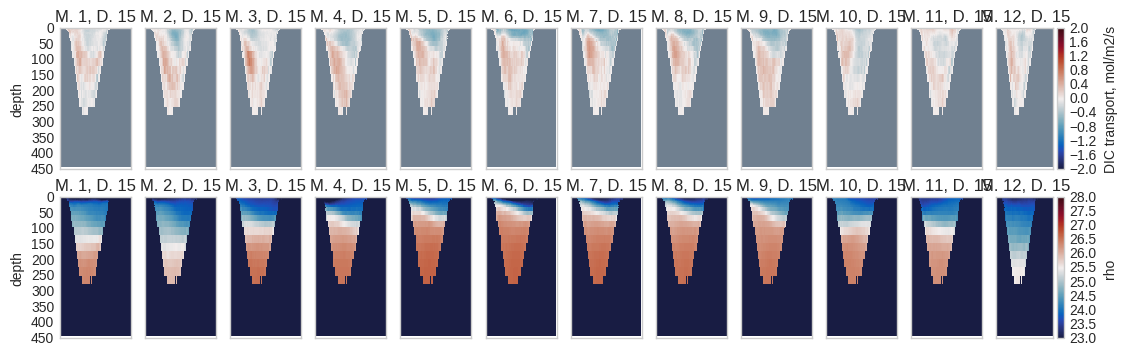

In [71]:
    fig = plt.figure(figsize=(13,4))

    for i in range(1,13):
        ax = fig.add_subplot(2,12,i)
        section_slice = np.arange(360, 460)
        
        sd = (DICtrans_stor[i-1,:,360:460])/1000
        #sd = (rho_jdfmouth_BR_real[:,360:460])
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.balance
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=-2, vmax=2 )
        if i == 12:
            cbar = fig.colorbar(mesh, ax=ax)
            cbar.set_label('DIC transport, mol/m2/s')
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('M. '+str(i) +', D. 15') 
        ax.set_ylabel('depth')
        ax.set_xticklabels([])
        if i == 1:
            ax.set_ylabel('depth')
        if i != 1:
            ax.set_ylabel('')
        ax.set_xticklabels([])
        if i != 1:
            ax.set_yticklabels([])
        
    for i in range(13,25):
        ax = fig.add_subplot(2,12,i)
        section_slice = np.arange(360, 460)
        
        sd = (rho_stor[i-13,:,360:460])
        #sd = (rho_jdfmouth_BR_real[:,360:460])
        tplt = np.ma.masked_values(sd,0)
        tcmap = cm.cm.balance
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=23, vmax=28 )
        if i == 24:
            cbar = fig.colorbar(mesh, ax=ax)
            cbar.set_label('rho')
        ax.invert_yaxis()
        land_colour = 'slategrey'
        cmap.set_bad(land_colour)
        plt.title('M. '+str(i-12) +', D. 15') 
        if i == 13:
            ax.set_ylabel('depth')
            
        ax.set_xticklabels([])
        if i != 13:
            ax.set_yticklabels([])

    #plt.suptitle('Jan 1, 2016, DIC transport and rho', fontsize = 20)
    #fig.tight_layout()
    fname = './monthly_transport_rho.png'
    fig.savefig(fname)
        #plt.close()
    plt.show()